In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data - Advertising.csv to Data - Advertising.csv


In [ ]:
import io
advert = pd.read_csv(io.BytesIO(uploaded['Data - Advertising.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
advert.head(10)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,5/19/2016 14:30,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,1/28/2016 20:59,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,3/7/2016 1:40,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,4/18/2016 9:33,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,7/11/2016 1:42,0


In [ ]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
advert.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


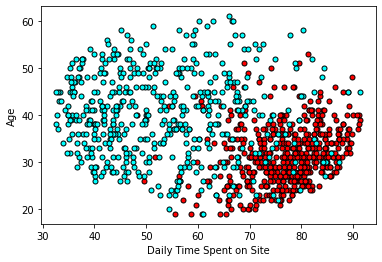

In [ ]:
 #create a function that will plot the graphs
 def plot_points(advert):
    X = np.array(advert[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']])
    y = np.array(advert['Clicked on Ad'])
    clicked = X[np.argwhere(y==1)]
    not_clicked = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in not_clicked], [s[0][1] for s in not_clicked], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in clicked], [s[0][1] for s in clicked], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Daily Time Spent on Site')
    plt.ylabel('Age')
    
# Plotting the points
plot_points(advert)
plt.show()

From the plot above, it can be inferred that people of all ages had the tendency to click on the Ad. Also, the plot shows that those who spend a lot of time on the site end up not clicking on the Ad.

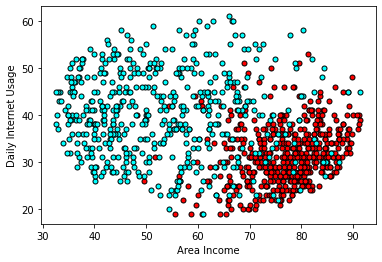

In [ ]:
 #create a function that will plot the graphs
 def plot_points(advert):
    X = np.array(advert[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']])
    y = np.array(advert['Clicked on Ad'])
    clicked = X[np.argwhere(y==1)]
    not_clicked = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in not_clicked], [s[0][1] for s in not_clicked], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in clicked], [s[0][1] for s in clicked], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Area Income')
    plt.ylabel('Daily Internet Usage')
    
# Plotting the points
plot_points(advert)
plt.show()

####From this plot, it shows that people with higher income do not click the ads on the site.

In [ ]:
# to make a copy of the data so as to tailor it to our needs, we drop the colums which we dont need such as ad topic line, city, country and timestamp
new_advert = advert.drop(['Ad Topic Line', 'City','Country', 'Timestamp'], axis = 1 )
new_advert.head(20)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
5,59.99,23,59761.56,226.74,1,0
6,88.91,33,53852.85,208.36,0,0
7,66.00,48,24593.33,131.76,1,1
8,74.53,30,68862.00,221.51,1,0
9,69.88,20,55642.32,183.82,1,0


In [ ]:
#Scaling the data to make all units take values between 0 and 1
new_advert['Daily Time Spent on Site'] = new_advert['Daily Time Spent on Site']/91.430000
new_advert['Age'] = new_advert['Age']/61.000000
new_advert['Area Income'] = new_advert['Area Income']/79484.800000	
new_advert['Daily Internet Usage'] = new_advert['Daily Internet Usage']/ 269.960000
new_advert.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,0.754129,0.573770,0.777934,0.948622,0,0
1,0.877502,0.508197,0.861068,0.717773,1,0
2,0.759816,0.426230,0.752168,0.876056,0,0
3,0.811003,0.475410,0.689518,0.910839,1,0
4,0.747785,0.573770,0.929612,0.835605,0,0
5,0.656130,0.377049,0.751861,0.839902,1,0
6,0.972438,0.540984,0.677524,0.771818,0,0
7,0.721864,0.786885,0.309409,0.488072,1,1
8,0.815159,0.491803,0.866354,0.820529,1,0
9,0.764301,0.327869,0.700037,0.680916,1,0


Splitting the data into training and Testing

In [ ]:
sample = np.random.choice(new_advert.index, size=int(len(new_advert)*0.8), replace=False)
train_data, test_data = new_advert.iloc[sample], new_advert.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 800
Number of testing samples is 200
     Daily Time Spent on Site       Age  ...  Male  Clicked on Ad
915                  0.372307  0.557377  ...     1              1
25                   0.861205  0.459016  ...     1              0
865                  0.432353  0.540984  ...     1              1
953                  0.497977  0.475410  ...     0              1
797                  0.842721  0.557377  ...     0              0
472                  0.857158  0.393443  ...     0              0
162                  0.787597  0.508197  ...     0              0
302                  0.429290  0.639344  ...     0              1
771                  0.704145  0.311475  ...     1              0
3                    0.811003  0.475410  ...     1              0

[10 rows x 6 columns]
    Daily Time Spent on Site       Age  ...  Male  Clicked on Ad
8                   0.815159  0.491803  ...     1              0
16                  0.605819  0.606557  ...     0     

In [ ]:
print(sample)

[915  25 865 953 797 472 162 302 771   3 203 480   0 191 537 758 249 704
 253 707 807 619 178 177 222 346 592 496 860 533 921 693 908 341 814 827
 354 630 600 652 248 783 212 308 737 935 435 943 175 753 923 803  82 837
 278 629 246 362 603 614 527 489 662 421  71 595 770 329 828 453 188 891
 544 810 541 809 187 434 867 441 380 229 763 775 821 488 625  52  98 593
 761  67 727 796 455 264 378 960 280 667 475 741 189 547 412  88 647 479
 832 517 749 554 457 932 819 261 642 107 459 193 561 675  81 465  93  38
 353 726 622 825 437 213 505 157 928 681 324 926   6 482 379 732 909 452
 941 100 695 588 296 288 194  19 635 282 918 784 845 223 685  92 679 674
 529 713 528 275 666 607 390 298 116 933 115 374 234  22 892 660 445 427
 585 286 506 684 954  12 672 423 759 609 779 846 266 240 952 492 526 724
 158 708 597 774 560 885 739 977 433 972 373 998 937 584 542 144 244 538
 514 959 736 702 272 535 886 389 307 507 830 440 888 387 986 501  57 404
  17 237 409 714 793 969 772 295 901 689  29 120 45

Splitting the data into Features and target Labels

In [ ]:
features = train_data.drop('Clicked on Ad', axis=1)
targets = train_data['Clicked on Ad']
features_test = test_data.drop('Clicked on Ad', axis=1)
targets_test = test_data['Clicked on Ad']

print(features[:10])
print(targets[:10])

     Daily Time Spent on Site       Age  ...  Daily Internet Usage  Male
915                  0.372307  0.557377  ...              0.647800     1
25                   0.861205  0.459016  ...              0.758594     1
865                  0.432353  0.540984  ...              0.526782     1
953                  0.497977  0.475410  ...              0.524448     0
797                  0.842721  0.557377  ...              0.874500     0
472                  0.857158  0.393443  ...              0.767780     0
162                  0.787597  0.508197  ...              0.929767     0
302                  0.429290  0.639344  ...              0.564380     0
771                  0.704145  0.311475  ...              0.668506     1
3                    0.811003  0.475410  ...              0.910839     1

[10 rows x 5 columns]
915    1
25     0
865    1
953    1
797    0
472    0
162    0
302    1
771    0
3      0
Name: Clicked on Ad, dtype: int64


Training the 2 - layer Network

In [ ]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

Back Propagate the Error

In [ ]:
# TODO: Write the error term formula
def error_term_formula(x, y, output):
    return (y - output) * sigmoid_prime(x)

In [ ]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.4

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.30862135642908617
Epoch: 100
Train loss:  0.24215796224610212
Epoch: 200
Train loss:  0.2226119627345287
Epoch: 300
Train loss:  0.20589382145590018
Epoch: 400
Train loss:  0.19153552177851035
Epoch: 500
Train loss:  0.1791815688900032
Epoch: 600
Train loss:  0.16853018593835475
Epoch: 700
Train loss:  0.1593231311954332
Epoch: 800
Train loss:  0.1513399008895424
Epoch: 900
Train loss:  0.144393317457294
Finished training!


Calculating The Accuracy on the Test data

In [ ]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.895
